<a href="https://colab.research.google.com/github/veronichaflasma/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Change linear brightness level 
--------------------------------
Input brightness : 50


Text(0.5, 1.0, 'Brightness Image')

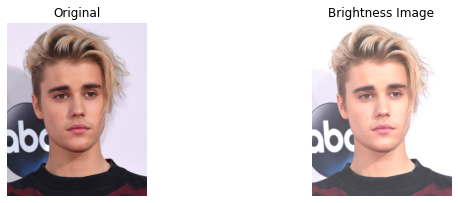

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #imagedisplay
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt
import math

# create figure 
fig = plt.figure(figsize=(10, 7)) 
# setting values to rows and column variables 
rows = 2
columns = 2

print(' Change linear brightness level ')
print('--------------------------------')
try:
  brightness = int(input('Input brightness : '))
except ValueError:
  print('Error, not a number')

readoriginal = cv.imread('/content/drive/MyDrive/Image_PCVK/justinbieber.jpg')
original = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)
brightness_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0,255)

# cara simple tanpa loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)
fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(original) 
plt.axis('off') 
plt.title("Original") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(brightness_image) 
plt.axis('off') 
plt.title("Brightness Image")

Change Contrass and Linear Brightness Level
-------------------------------------------


Text(0.5, 1.0, 'Brightness Image')

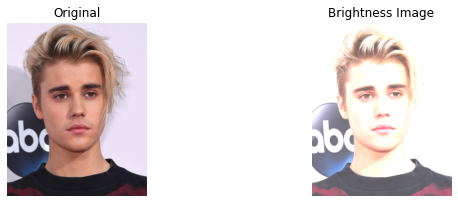

In [ ]:
#TASKS

#NUMBER 1

#create figure 
fig = plt.figure(figsize=(10, 7)) 
# setting values to rows and column variables 
rows = 2
columns = 2

print('Change Contrass and Linear Brightness Level')
print('-------------------------------------------')
try:
  brightness = int(input('Input brightness  (-255 until 255) : '))
  contrass = float(input('Input contrass  (1.0 until 3.0): '))
except ValueError:
  print('Error, its not a number')

readoriginal = cv.imread('/content/drive/MyDrive/Image_PCVK/justinbieber.jpg')
original = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)
brightness_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

#pixel access
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrass * original[y,x,c] + brightness, 0,255)

fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(original) 
plt.axis('off') 
plt.title("Original") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(brightness_image) 
plt.axis('off') 
plt.title("Brightness Image")

Change Brightness with Log Transformation
-----------------------------------------
Input brightness (-255 until 255) : 40


Text(0.5, 1.0, 'Logarithmic Brightness Image')

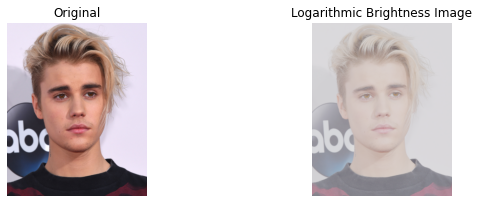

In [ ]:
#NUMBER 2

# create figure 
fig = plt.figure(figsize=(10, 7)) 
# setting values to rows and column variables 
rows = 2
columns = 2

print('Change Brightness with Log Transformation')
print('-----------------------------------------')
try:
  brightness = int(input('Input brightness (-255 until 255) : '))
except ValueError:
  print('Error, its not a number')

readoriginal = cv.imread('/content/drive/MyDrive/Image_PCVK/justinbieber.jpg')
original = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)
brightness_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

#pixel access
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * math.log(1 + original[y,x,c]), 0,255)

fig.add_subplot(rows, columns, 1) 
  
# showing image 
plt.imshow(original) 
plt.axis('off') 
plt.title("Original") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 2) 
  
# showing image 
plt.imshow(brightness_image) 
plt.axis('off') 
plt.title("Logarithmic Brightness Image")

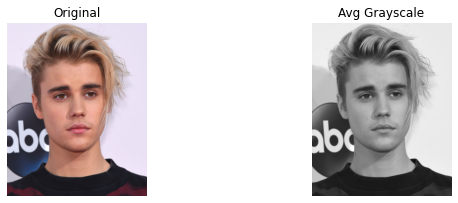

In [ ]:
#NUMBER 3

# create figure 
fig = plt.figure(figsize=(10, 7)) 
# setting values to rows and column variables 
rows = 2
columns = 2
grayscale_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

grayscale_image[:] = original.mean(axis=-1, keepdims=1)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(original)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(grayscale_image)
plt.axis('off')
plt.title("Avg Grayscale")

plt.show()

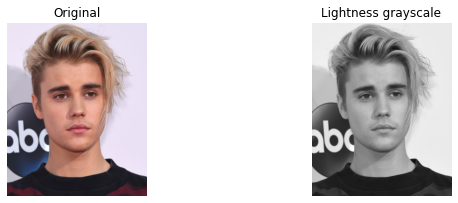

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2

grayscale_image_light = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)
grayscale_image_light[:] = np.max(original, axis=-1, keepdims=1) / 2 + np.min(original, axis=-1, keepdims=1) / 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(original)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(grayscale_image_light)
plt.axis('off')
plt.title("Lightness grayscale")
plt.show()

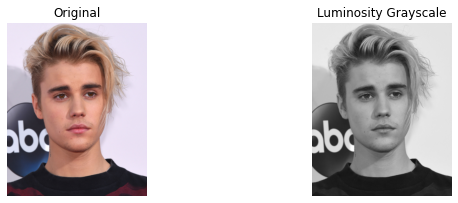

In [ ]:
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2

grayscale_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

W = [0.21, 0.72, 0.07]
W_mean = np.tensordot(original, W, axes=((-1, -1)))[..., None]
grayscale_image[:] = W_mean.astype(original.dtype)

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(original)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(grayscale_image)
plt.axis('off')
plt.title("Luminosity Grayscale")
plt.show()

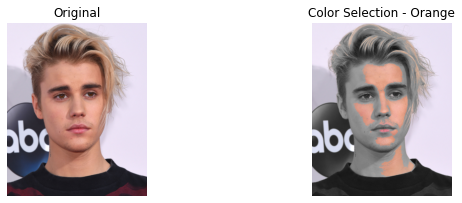

In [17]:
#NUMBER 4

# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 2
columns = 2
grayscale_image = cv.cvtColor(readoriginal, cv.COLOR_BGR2RGB)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        if (original[i, j, 0] < 210 and original[i, j, 1] < 160):
            grayscale_image[i, j] = np.mean(original[i, j])

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(original)
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(grayscale_image)
plt.axis('off')
plt.title("Color Selection - Orange")
plt.show()